In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

#tf.random.set_seed(23)

import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ... (Your other imports)
train_path = '/Users/kushalpanchal/Downloads/archive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'
val_path = '/Users/kushalpanchal/Downloads/archive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val'
test_path = '/Users/kushalpanchal/Downloads/archive/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test'

files_and_folders = os.listdir(train_path)
class_names = [item for item in files_and_folders if item != '.DS_Store'] 

# ... (Your other code: import_data, dataset creation, etc.) 


In [3]:
class_names

['fractured', 'not fractured']

In [4]:
def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path,i)
        label = []
        if i == 'fractured':
            label = [0,1]
        elif i == 'not fractured':
            label = [1,0]
        
        for j in os.listdir(full_path):
            try:
                img = cv2.imread(os.path.join(full_path,j))
                # img = cv2.cvtColor(img , cv2.COLOR_RGB2BGR)
                img_resized = cv2.resize(img,(224,224))
                dataset.append([img_resized,label])
            except :
                pass
    random.shuffle(dataset)
# creating the dataset

train_df = []
import_data(train_df,train_path,class_names)
train_df = pd.DataFrame(train_df,columns=['image','label'])
train_stack = np.stack(train_df.image)
train_stack_label = np.stack(train_df.label)

libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


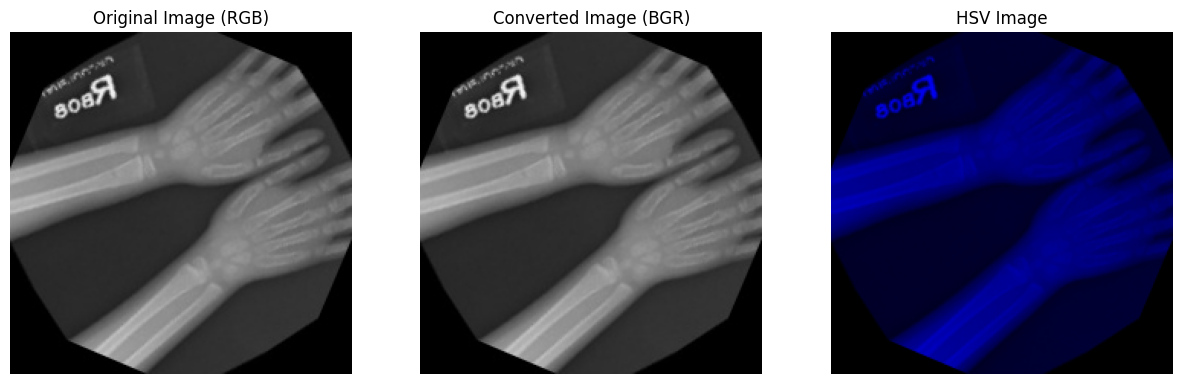

Label: [0 1]


In [5]:
import random
import matplotlib.pyplot as plt
import cv2

# Assuming train_stack and train_stack_label are already defined

random_index = random.randint(0, len(train_stack) - 1)
random_image = train_stack[random_index]
random_label = train_stack_label[random_index]

# Convert to HSV
hsv_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2HSV)

# --- Display Original, Resized, and HSV Images ---

plt.figure(figsize=(15, 5))  # Set the figure size

# Original Image (Before Resizing)
plt.subplot(1, 3, 1)  # Create a subplot for the original image
plt.title('Original Image (RGB)')
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for display
plt.axis('off')  # Turn off axis labels

# Resized Image
plt.subplot(1, 3, 2)  # Create a subplot for the resized image
plt.title('Converted Image (BGR)')
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))  # Convert back to RGB for display
plt.axis('off')  # Turn off axis labels

# HSV Image
plt.subplot(1, 3, 3)  # Create a subplot for the HSV image
plt.title('HSV Image')
plt.imshow(hsv_image)  # Display the HSV image
plt.axis('off')  # Turn off axis labels

plt.show()  # Display the plot

print("Label:", random_label)  # Print the image's label


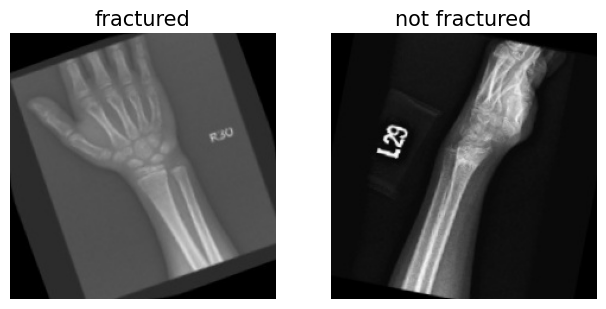

In [6]:
plt.figure(figsize=(20,20))
for i in range(2):
    plt.subplot(5,5,i+1)
    plt.imshow(train_df.image[i])
    plt.title(class_names[np.argmax(train_df.label[i])],size=15)
    plt.axis('off')

In [6]:
val_df = []
import_data(val_df,val_path,class_names)
val_df = pd.DataFrame(val_df,columns=['image','label'])
val_stack = np.stack(val_df.image)
val_stack_label = np.stack(val_df.label)

test_df = []
import_data(test_df,test_path,class_names)
test_df = pd.DataFrame(test_df,columns=['image','label'])
test_stack = np.stack(test_df.image)
test_stack_label = np.stack(test_df.label)

Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


In [7]:
print(f'train : {len(train_df)}')
print(f'val : {len(val_df)}')
print(f'test : {len(test_df)}')


train : 9243
val : 829
test : 506


In [8]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(
    include_top = False,
    weights='imagenet',
    input_shape = (224,224,3))

vgg16.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
# model_12  VGG16+ 2CNN

# let's build and train the model 
model_12 = Sequential()
model_12.add(vgg16)
model_12.add(layers.Conv2D(32,(3,3),padding='same',
                           activation = 'relu',
                           kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.4))
model_12.add(layers.Conv2D(32,(5,5),padding='same',
                           activation = 'relu',
                           kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.4))
# ann layers
model_12.add(layers.Flatten())
model_12.add(layers.BatchNormalization())
model_12.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.5))

#no of classes is 2
model_12.add(layers.Dense(units=2,activation='sigmoid'))


In [10]:

model_12.compile(optimizer=Adam(learning_rate=0.00015),
                 loss= 'binary_crossentropy', metrics=['accuracy'])


In [11]:
model_12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
train_stack_lb = np.stack(train_df.label)
train_val_lb = np.stack(val_df.label)
train_stack[1].shape

(224, 224, 3)

In [13]:
model_12.fit(train_stack,train_stack_label,epochs=20, validation_data = (val_stack,val_stack_label) , callbacks= early_stopping)

Epoch 1/20


2024-05-19 13:06:38.755136: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-05-19 13:06:38.755197: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-05-19 13:06:38.755207: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-05-19 13:06:38.755215: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-05-19 13:06:38.755223: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-05-19 13:06:38.755231: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-05-19 13:06:38.755239: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-05-19 13:06:38.755247: E external/local_xla/xla/se

  2/289 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.6094 - loss: 9.5157   

I0000 00:00:1716124017.120323      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


288/289 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6107 - loss: 8.3121

2024-05-19 13:07:17.625534: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.99165, expected 3.3217
2024-05-19 13:07:17.625595: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.28926, expected 4.61931
2024-05-19 13:07:17.625604: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.06719, expected 4.39724
2024-05-19 13:07:17.625612: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.46955, expected 4.7996
2024-05-19 13:07:17.625620: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.74731, expected 3.07735
2024-05-19 13:07:17.625628: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.78108, expected 3.11113
2024-05-19 13:07:17.625636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 5.36791, expected 4.69796
2024-05-19 13:07:17.625644: E external/local_xla/xla/

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6110 - loss: 8.3083

2024-05-19 13:07:35.685264: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.5554, expected 3.07265
2024-05-19 13:07:35.685334: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13778, expected 2.65504
2024-05-19 13:07:35.685350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.34289, expected 2.86015
2024-05-19 13:07:35.685369: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 181: 3.72137, expected 3.23862
2024-05-19 13:07:35.685381: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 198: 3.32536, expected 2.84261
2024-05-19 13:07:35.685392: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 199: 3.81774, expected 3.335
2024-05-19 13:07:35.685403: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 223: 2.84685, expected 2.36411
2024-05-19 13:07:35.685437: E external/local_xla

289/289 ━━━━━━━━━━━━━━━━━━━━ 76s 177ms/step - accuracy: 0.6113 - loss: 8.3045 - val_accuracy: 0.8794 - val_loss: 5.2349
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.8941 - loss: 4.6143 - val_accuracy: 0.9288 - val_loss: 3.0578
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9733 - loss: 2.6461 - val_accuracy: 0.9590 - val_loss: 1.8192
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9879 - loss: 1.5694 - val_accuracy: 0.9650 - val_loss: 1.1304
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9942 - loss: 0.9528 - val_accuracy: 0.9867 - val_loss: 0.6862
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9962 - loss: 0.6013 - val_accuracy: 0.9867 - val_loss: 0.4515
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9929 - loss: 0.4072 - val_accuracy: 0.9928 - val_loss: 0.3106
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9951 - loss: 0.2899 - val_accura

In [14]:
history_acc = model_12.history.history['accuracy']
history_val_acc = model_12.history.history['val_accuracy']
history_loss = model_12.history.history['loss']
history_val_loss = model_12.history.history['val_loss']



<Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>

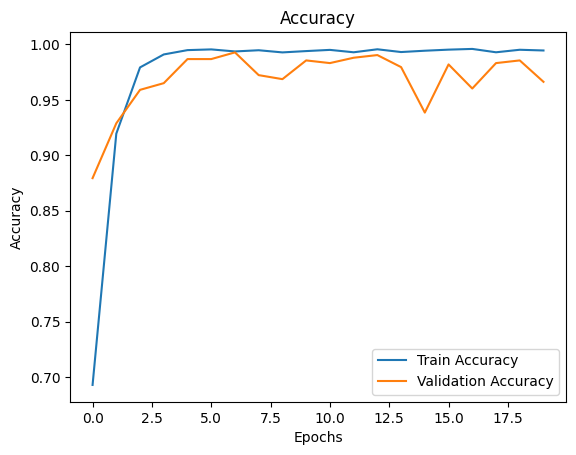

In [15]:
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
sns.lineplot(data = history_acc, label = 'Train Accuracy')
sns.lineplot(data = history_val_acc, label = 'Validation Accuracy')

<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>

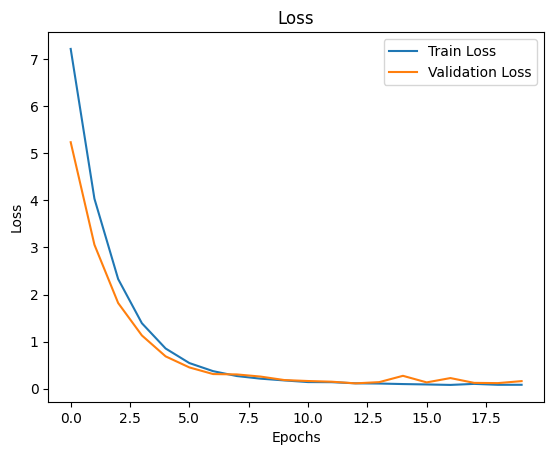

In [16]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data = history_loss, label = 'Train Loss')
sns.lineplot(data = history_val_loss, label = 'Validation Loss')


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [18]:
def prediction(model,test_stack = test_stack, test_df = test_stack_label):
    
    output = model.predict(test_stack)
    output = np.round(output)
    prediction = output
    print("-"*100)
    print(f'Accuracy Score : {accuracy_score(test_stack_label,prediction)}')
    print(f'Precision Score : {precision_score(test_stack_label,prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_stack_label,prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_stack_label,prediction, average="weighted")}')
    
prediction(model_12)

15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

2024-05-19 13:14:14.315931: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.46443, expected 2.59124
2024-05-19 13:14:14.315995: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.84232, expected 3.96913
2024-05-19 13:14:14.316005: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.91526, expected 4.04207
2024-05-19 13:14:14.316013: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.02814, expected 4.15494
2024-05-19 13:14:14.316021: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.53562, expected 3.66243
2024-05-19 13:14:14.316029: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.79722, expected 3.92403
2024-05-19 13:14:14.316036: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.69349, expected 3.82029
2024-05-19 13:14:14.316044: E external/local_xla/xla/se

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 907ms/step
----------------------------------------------------------------------------------------------------
Accuracy Score : 0.9822134387351779
Precision Score : 0.9822168176353044
Recall Score : 0.9822134387351779
F1 Score : 0.982211277083118


In [19]:
ls=[]
for i in test_stack_label:
    ls.append(np.argmax(i))

test_stack_one_label = np.array(ls)

In [20]:
import seaborn as sns
def  plot_confusion_matrix(model,test_stack = test_stack, test_label = test_stack_one_label):
    ''' we will Print the confusion matrix '''
    
    output = model.predict(test_stack)
    output = np.round(output).astype(int)
    prediction = output
    ls=[]
    for i in output:
        ls.append(np.argmax(i))
    prediction = np.array(ls)

    accuracy = accuracy_score(test_label,prediction)
    # where the accuracy is more than 94% we will show the CM as blue...
    if accuracy > 0.94:
        cmap = 'Blues'
    else :
        cmap = 'Reds'
    cm = confusion_matrix(test_label, prediction)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g')  
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


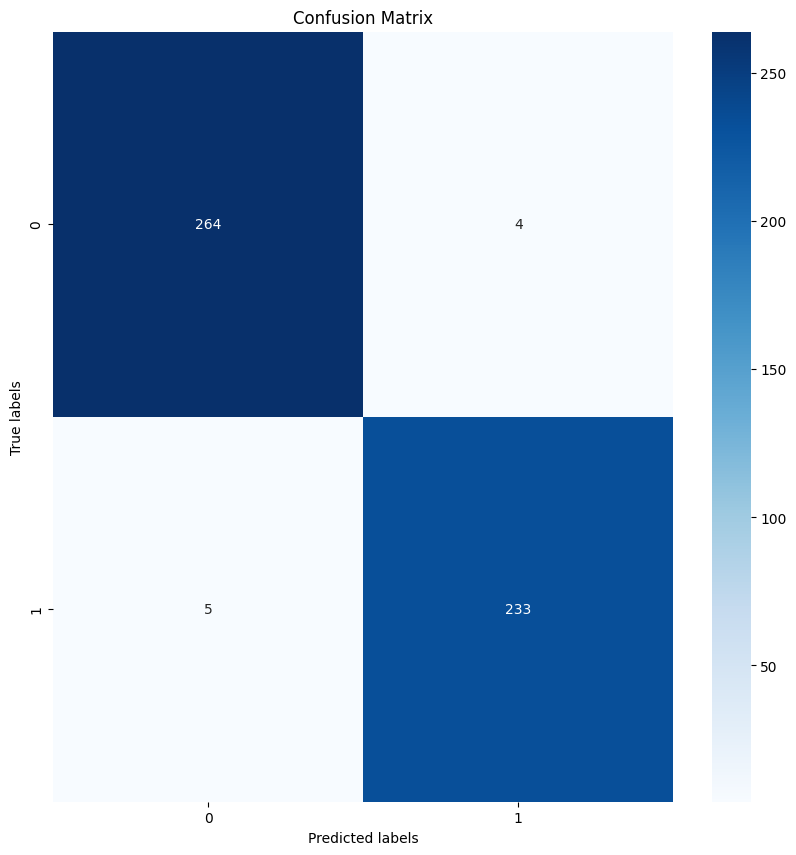

In [21]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(model_12)